# Decision Tree Example

This notebook uses a sampling of data taken from the Buzzfeed news Github repository on the analysis of surveillance planes found [here](https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes) and arbitrarily assigned classes.

In [1]:
!sudo add-apt-repository universe 
!sudo apt update
!sudo apt install -y graphviz
!pip3 install --user graphviz

'universe' distribution component is already enabled for all sources.
Ign:1 https://dl.bintray.com/sbt/debian  InRelease
Get:2 https://dl.bintray.com/sbt/debian  Release [815 B]                       
Get:3 https://dl.bintray.com/sbt/debian  Release.gpg [821 B]                   
Get:4 https://deb.nodesource.com/node_10.x bionic InRelease [4,584 B]          
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 https://dl.bintray.com/sbt/debian  Packages [4,561 B]                    
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://security.ubuntu.com/ubuntu bionic-secu

7Progress: [ 13%] [#######...................................................] 87Progress: [ 15%] [########..................................................] 8Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.40.1-2_amd64.deb ...
7Progress: [ 16%] [#########.................................................] 8Unpacking libcgraph6 (2.40.1-2) ...
7Progress: [ 18%] [##########................................................] 87Progress: [ 20%] [###########...............................................] 8Selecting previously unselected package libgd3:amd64.
Preparing to unpack .../04-libgd3_2.2.5-4ubuntu0.4_amd64.deb ...
7Progress: [ 21%] [############..............................................] 8Unpacking libgd3:amd64 (2.2.5-4ubuntu0.4) ...
7Progress: [ 23%] [#############.............................................] 87Progress: [ 25%] [##############............................................] 8Selecting previously unselecte

In [2]:
#get the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython import display
from sklearn.externals.six import StringIO  
import graphviz 

In [3]:
#read in data
data = pd.read_csv('/mnt/data/simple_example_classes.csv')

In [4]:
#look at a few rows of data
data.sample(5)

,speed,altitude,class
87,112,4200,other
74,96,4600,other
26,70,5600,other
34,72,5549,other
21,66,5675,other


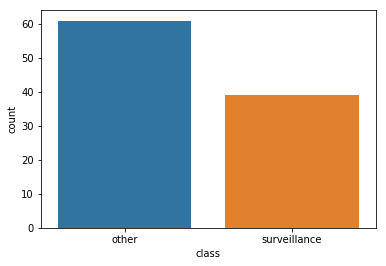

In [5]:
#look at breakdown of classes
sns.countplot(x='class', data=data);

In [6]:
#create the X and y data from our dataset
X = data[['speed', 'altitude']]
y = data['class']

In [7]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

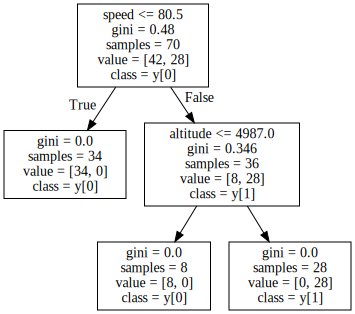

In [8]:
#create and fit decision tree model
decision_tree_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# Generate a plot of the decision tree
columns=list(X_train.columns)
graphviz.Source(tree.export_graphviz(decision_tree_model, out_file=None, feature_names=columns,class_names=True))

In [9]:
#make predictions on the test data
predictions = decision_tree_model.predict(X_test)

In [10]:
#create a data frame that compares the real values to the predicted values
test_data = pd.concat([X_test, y_test], axis=1)
test_data['predicted_class'] = predictions
test_data.reset_index(drop=True, inplace=True)
test_data.head()

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,surveillance,surveillance
3,80,7125,other,other
4,80,6325,other,other


In [11]:
test_data[(test_data['speed'] <= 80.5) & (test_data['altitude'] <= 4987)]

,speed,altitude,class,predicted_class
5,75,4950,other,other
8,60,4375,other,other
9,0,3600,other,other
11,70,4300,other,other
13,71,4400,other,other
15,47,4700,other,other
18,60,4290,other,other
25,62,4550,other,other


In [12]:
test_data[(test_data['speed'] > 80.5) & (test_data['altitude'] > 4987)]

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,surveillance,surveillance
7,105,8900,surveillance,surveillance
12,94,7400,surveillance,surveillance
16,98,8425,surveillance,surveillance
17,98,9474,surveillance,surveillance
20,83,6325,surveillance,surveillance
24,93,7625,surveillance,surveillance
27,137,8350,surveillance,surveillance


In [13]:
#print accuracy score for the test set
decision_tree_model.score(X_test, y_test)

1.0